In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pandas as pd

In [2]:
data = pd.read_csv('model_df.csv')

In [3]:
data.head()

,year,month,mkt_carrier_fl_num,crs_dep_time,taxi_out,taxi_in,crs_arr_time,arr_delay,air_time,distance,weekday,day_of_month,MonthlyDelayCarrier,airline_code,origin_code,dest_code
0,2018,1,5458,1946,14.0,4.0,2120,-6.0,71.0,396.0,0,1,3.494772,0,348,127
1,2018,1,596,1805,9.0,14.0,2004,0.0,142.0,1044.0,0,1,3.494772,0,166,259
2,2018,1,599,855,16.0,12.0,1058,2.0,219.0,1477.0,0,1,3.494772,0,79,319
3,2018,1,600,607,15.0,6.0,810,-14.0,91.0,632.0,0,1,3.494772,0,111,58
4,2018,1,638,700,24.0,47.0,1010,16.0,261.0,1814.0,0,1,3.494772,0,261,259


In [4]:
data.columns

Index(['year', 'month', 'mkt_carrier_fl_num', 'crs_dep_time', 'taxi_out',
       'taxi_in', 'crs_arr_time', 'arr_delay', 'air_time', 'distance',
       'weekday', 'day_of_month', 'MonthlyDelayCarrier', 'airline_code',
       'origin_code', 'dest_code'],
      dtype='object')

In [5]:
numeric_cols = ['taxi_out', 'taxi_in', 'air_time', 'MonthlyDelayCarrier']
cat_cols = list(set(data.columns) - set(numeric_cols) - {'arr_delay'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['taxi_out', 'taxi_in', 'air_time', 'MonthlyDelayCarrier']
['airline_code', 'crs_arr_time', 'crs_dep_time', 'day_of_month', 'dest_code', 'distance', 'mkt_carrier_fl_num', 'month', 'origin_code', 'weekday', 'year']


In [6]:
X = data.drop('arr_delay', 1)
y = data['arr_delay']

C:\Users\Owner\AppData\Local\Temp/ipykernel_5040/1139672721.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('arr_delay', 1)


In [7]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Baseline Model

## PCA

In [8]:
#normlize it
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
df_train = pca.fit_transform(X_train)
df_test = pca.transform(X_test)

In [10]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.14831393, 0.11408777, 0.08449085, 0.07357316, 0.07009908,
       0.06894676, 0.06708332, 0.0665053 , 0.06548068, 0.06440912,
       0.05778478, 0.05068133, 0.04762954, 0.01988852, 0.00102586])

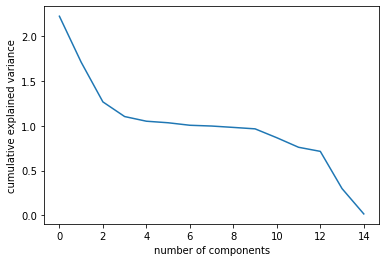

In [11]:
# n=3 looks good
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(df_train)
X_test = pca.transform(df_test)

In [13]:
pca.explained_variance_ratio_

array([0.14831393, 0.11408774, 0.08449057])

## Multiple Regression Model

### Regression model with PCA components

In [14]:

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm

#Then we initialize the object and fit the model on our data:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_train.shape

(250234,)

In [16]:
# print the R-squared value for the model
regressor.score(X_train,y_train)

0.04090091035277155

In [17]:
regressor.score(X_test,y_test)

0.04198062506727951

### Regression with original variables

In [18]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

#Then we initialize the object and fit the model on our data:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
# print the R-squared value for the model
regressor.score(X_train,y_train)

0.08309042120697507

In [21]:
regressor.score(X_test,y_test)

0.08423409727117082

## Polynomial Regression Model

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [23]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [24]:
regr1 = LinearRegression()
poly = PolynomialFeatures(degree = 3)
Xpoly = poly.fit_transform(X_train)
regr1.fit(Xpoly, y_train)
Xpolytest = poly.fit_transform(X_test)
result = regr1.predict(Xpolytest)
print('Mean squared error:', mean_squared_error(result,y_test))


Mean squared error: 2224.6409927008813


In [25]:
print('R square:', r2_score(result,y_test))

R square: -7.221401517282565


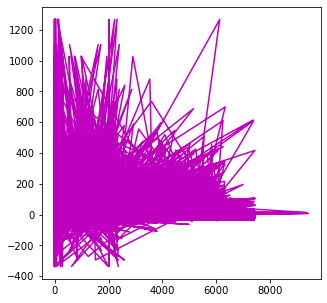

In [99]:
plt.plot(X_test, result, color='m')
plt.show()

## Random Forest Regressor Model

In [26]:
# import Random Forest regresssor since our target variable is continous

from sklearn.ensemble import RandomForestRegressor

In [27]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
# instantiate the classifier 

rfc = RandomForestRegressor(random_state=0)

In [29]:
# fit the model

rfc.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
score = rfc.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.866447385057574


In [31]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [32]:
scoretest = rfc.score(X_test, y_test)
print("R-squared:", scoretest)   

R-squared: 0.04667291637817195


* Tuning with GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
rfregressor=RandomForestRegressor()

In [54]:
param_grid = {
   'n_estimators': [10, 100, 500],
   'max_features': [4,5,6,7],
   'max_depth' : [2,3,4,5,6],
   #'criterion' :['mse', 'mae']
}


In [56]:
import time

start_time = time.time()

GSCV = GridSearchCV(estimator=rfregressor, param_grid=param_grid, cv=3)
GSCV.fit(X_train, y_train)

finish_time = time.time()
total_time = finish_time - start_time

print('Elapsed time: ', total_time)

Elapsed time:  4417.746244192123


In [57]:
GSCV.best_params_ 

{'max_depth': 6, 'max_features': 7, 'n_estimators': 500}

In [58]:
#using the best parameters
randmf = RandomForestRegressor(n_estimators = 500, max_features = 7, max_depth= 6) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(max_depth=6, max_features=7, n_estimators=500)

In [59]:
y_pred_randmf = randmf.predict( X_test )

In [60]:
score2 = randmf.score(X_train, y_train)
print("R-squared:", score2) 

R-squared: 0.09310287889953206


In [61]:
scoretest2 = randmf.score(X_test, y_test)
print("R-squared:", scoretest2)  

R-squared: 0.07364542645080208


## XGBoost Model

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import numpy as np

In [34]:
X = data.drop('arr_delay', 1)
y = data['arr_delay']

C:\Users\Owner\AppData\Local\Temp/ipykernel_5040/1139672721.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('arr_delay', 1)


In [35]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [36]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
#instantiate an XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 2, n_estimators = 100)

In [38]:
# fit and make predictions
import time

start_time = time.time()

xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

finish_time = time.time()
total_time = finish_time - start_time

print('Elapsed time: ', total_time)

[08:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Elapsed time:  4.531712055206299


In [39]:
mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(y_test,y_pred)
print("RMSE: ", mse**(1/2))
#print("MAE: ", mae) 
scoretest = xg_reg.score(X_test, y_test)
print("R-squared:", scoretest)

RMSE:  47.958778011498914
R-squared: 0.09145240266402643


In [40]:
scoretrain = xg_reg.score(X_train, y_train)
print("R-squared:", scoretrain)

R-squared: 0.14831521385323876


In [41]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 6, 'alpha': 2}

[08:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


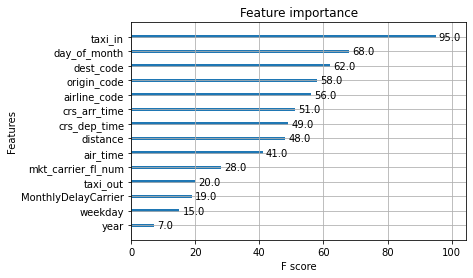

In [42]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### k-fold Cross Validation using XGBoost

In [125]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 6, 'alpha': 2}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=1000,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[21:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [126]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,49.857140,0.300649,49.844829,1.197739
1,49.604795,0.286718,49.598016,1.219618
2,49.525517,0.277779,49.520182,1.256958
3,49.329823,0.339837,49.329628,1.171564
4,49.201907,0.318175,49.202678,1.216007


In [127]:
print((cv_results["test-rmse-mean"]).tail(1))  #model not improved. try different parameters or models.

999    24.236162
Name: test-rmse-mean, dtype: float64


### Random Search for XGBost

In [43]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[10,100,500],
    #'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)],  
    #'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [3,6,9,12],
    #'objective': ['reg:squarederror', 'reg:tweedie'],
    #'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [45]:
reg = XGBRegressor(nthread=-1)

In [46]:
n_iter_search = 10
random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [47]:
import time

start_time = time.time()
random_search.fit(X_train, y_train)

finish_time = time.time()
total_time = finish_time - start_time

print('Elapsed time: ', total_time)

Elapsed time:  424.6402938365936


In [48]:
best_regressor = random_search.best_estimator_

In [49]:
from sklearn.metrics import mean_absolute_error

# Get predictions
y_pred = best_regressor.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("RMSE: ", mse**(1/2))
print("MAE: ", mae) 
scoretest = best_regressor.score(X_test, y_test)
print("R-squared:", scoretest)                

RMSE:  47.888693551915374
MAE:  21.69661982706118
R-squared: 0.09410587067511478


In [51]:
scoretrain = best_regressor.score(X_train, y_train)
print("R-squared:", scoretrain)  

R-squared: 0.11763147246463024
